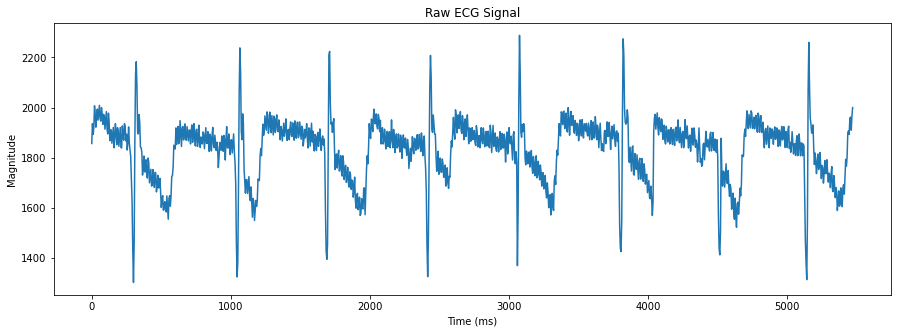

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

# Read data from the CSV file
data = pd.read_csv('data.csv', header=None)

# Generate the 'x' values based on the number of 'y' values and the time interval (50 ms)
x = np.arange(data.shape[0]) * 5

# Convert the first row of the DataFrame to a NumPy array
y = data.to_numpy()
raw_y = y.reshape(1095,)

# Create a line plot
plt.figure(figsize=(15,5))
plt.plot(x, raw_y)

# Add labels and a title
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Raw ECG Signal')

# Show the plot
plt.show()


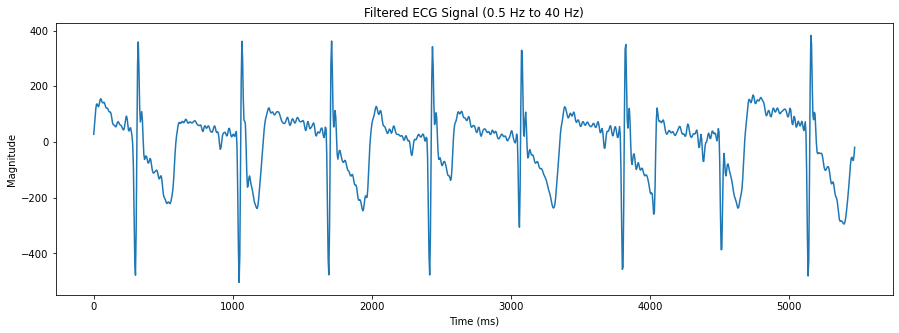

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Read data from the CSV file
data = pd.read_csv('data.csv', header=None)

# Generate the 'x' values based on the number of 'y' values and the time interval (50 ms)
x = np.arange(data.shape[0]) * 5

# Convert the first row of the DataFrame to a NumPy array
y = data.to_numpy()
y = y.reshape(1095,)

# Filter the data
fs = 200  # Sampling frequency (1 / (5ms) = 200 Hz)
lowcut = 0.5
highcut = 40
y_filtered = butter_bandpass_filter(y, lowcut, highcut, fs)

# Create a line plot
plt.figure(figsize=(15, 5))
plt.plot(x, y_filtered)

# Add labels and a title
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Filtered ECG Signal (0.5 Hz to 40 Hz)')

# Show the plot
plt.show()


In [144]:
def Low_Filter(f,R,C):                     # Define the Filter function that corresponds to the low pass RC filter.
    omega = 2*np.pi*f
    vout=( 1./(1j*R*omega*C+1.))
    return(vout)

Filter cut off frequency is:   26.53 Hz


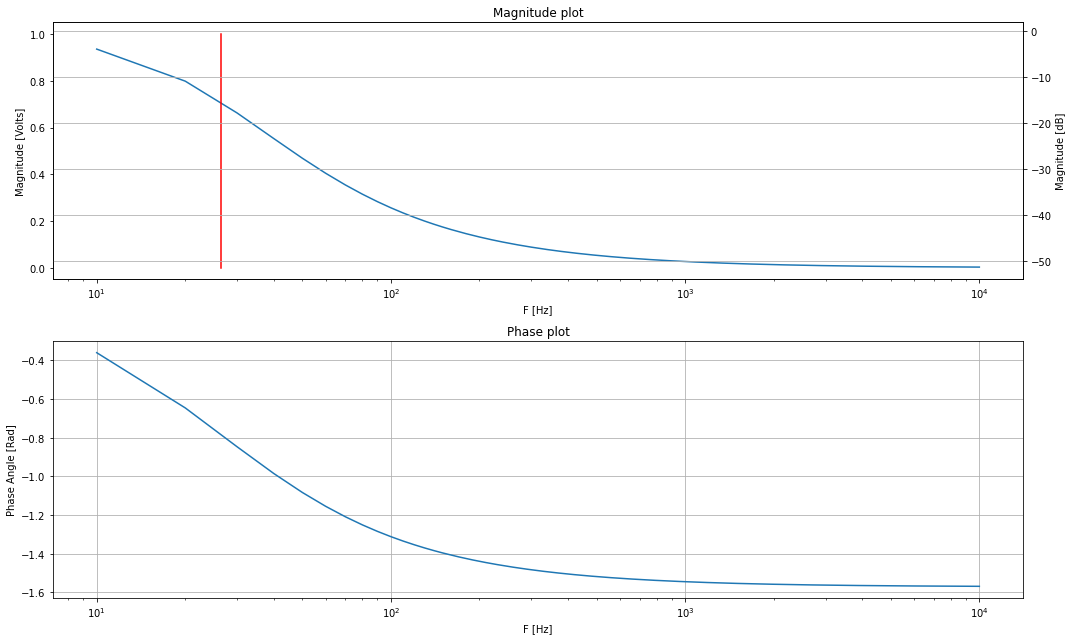

In [179]:
f = np.linspace(10,10000,1000)
R=600. # 330Ohm
C=10.e-6  # 10µF
vout_c = Low_Filter(f,R,C)
F_cut = 1./(2.*np.pi*R*C)
y_db = 20 * np.log10(np.abs(vout_c))
print("========================================")
print("Filter cut off frequency is: {:7.2f} Hz".format(F_cut))
print("========================================")
plt.figure(figsize=(15,9)) # Make a figure, and make it bigger.
plt.subplot(2,1,1)         # First subplot in the figure with (2 columns, 1 row, 1st subplot)
plt.plot(f,np.abs(vout_c)) # Plot the amplitude, the absolute of the complex number
plt.plot([F_cut,F_cut],[0,1],color="red",label="Cut off frequency")  # plot a line for the filter cut frequency

plt.title("Magnitude plot")
plt.xlabel("F [Hz]")
plt.ylabel("Magnitude [Volts]")

ax2 = plt.twinx()
ax2.plot(f, y_db, alpha=0.0)  # Plot an invisible line to create the second y-axis
ax2.set_ylabel("Magnitude [dB]")

plt.xscale("log")           # Set x to a log scale
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(f,np.angle(vout_c)) # Plot the amplitude, the absolute of the complex number
plt.title("Phase plot")
plt.xlabel("F [Hz]")
plt.ylabel("Phase Angle [Rad]")
plt.xscale("log")
plt.grid(True)
plt.tight_layout()          # Automatically adjust spacing between the 2 plots so they do not overlap
plt.show()

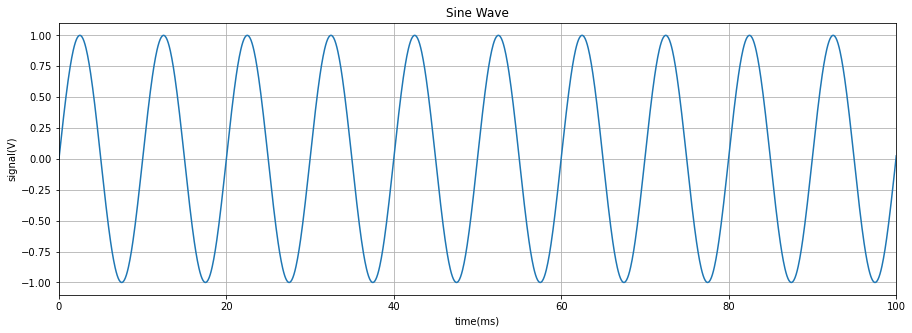

In [149]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift
from scipy import signal


F = 100.
T = 2.
N = 2**15
DT = T/N
t = np.linspace(0., T, N)

y_sin = np.sin(2 * np.pi * F * t)  # Create a sine wave

plt.figure(figsize=(15, 5))
plt.plot(1000 * t, y_sin)  # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
ax.set_xlim(0., 100.)  # Show only the first 100 ms of the signal
ax.set_ylim(-1.1, 1.1)
plt.grid(True)
plt.title("Sine Wave")
plt.xlabel("time(ms)", position=(0.95, 1))
plt.ylabel("signal(V)", position=(1, 0.9))
plt.show()


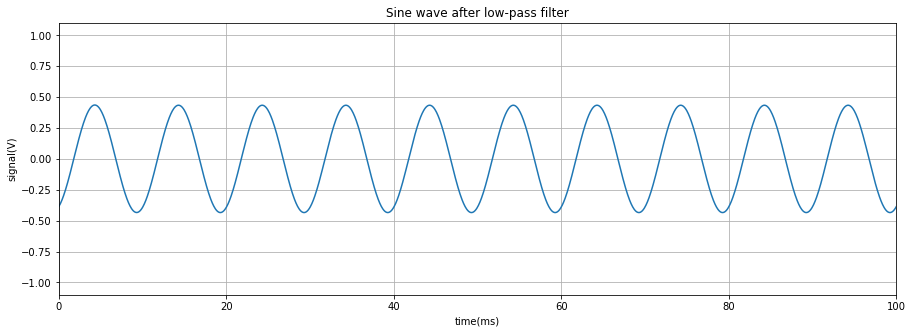

In [150]:
F = 100.
T = 2.
N = 2**15
DT = T/N
t = np.linspace(0., T, N)

y_sin = np.sin(2 * np.pi * F * t)  # Create a sine wave

f_fft = fftfreq(N, DT)
y_sin_fft = fft(y_sin)

# Apply the filter only to the non-zero frequency components
y_sin_fft_out = np.where(f_fft != 0, y_sin_fft * Low_Filter(f_fft, R, C), y_sin_fft)
y_sin_out = ifft(y_sin_fft_out)

plt.figure(figsize=(15, 5))
plt.plot(1000 * t, np.real(y_sin_out))
ax = plt.gca()
ax.set_xlim(0., 100.)  # Show only the first 100 ms of the signal
ax.set_ylim(-1.1, 1.1)
plt.grid(True)
plt.title("Sine wave after low-pass filter")
plt.xlabel("time(ms)", position=(0.95, 1))
plt.ylabel("signal(V)", position=(1, 0.9))
plt.show()


Filter cut off frequency is:    1.59 Hz


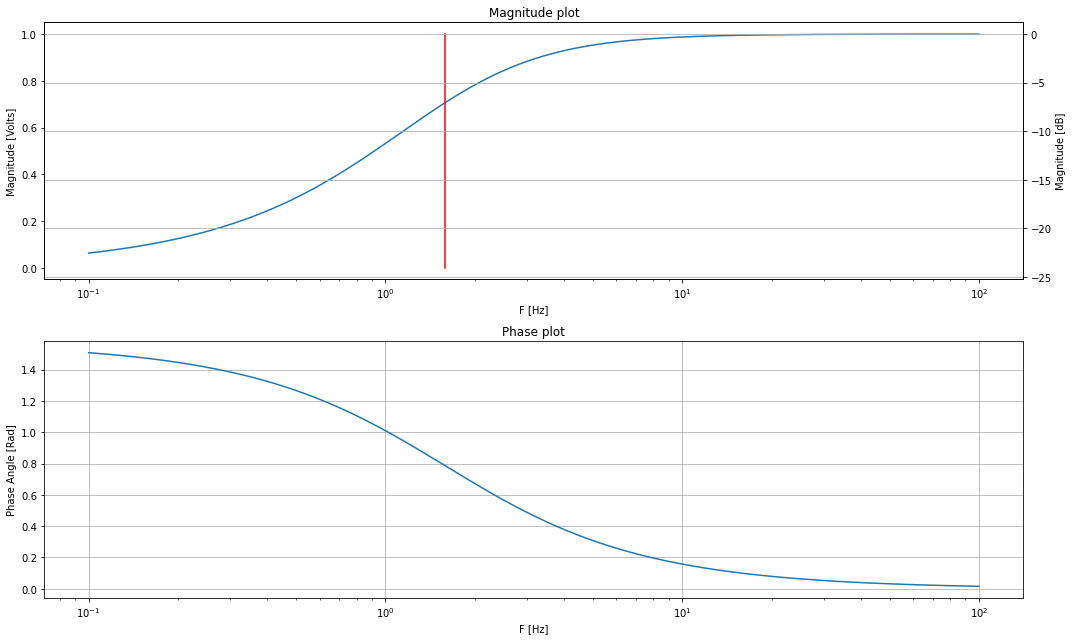

In [170]:
# High Pass Filter
def High_Filter(f, R, C):  # Define the Filter function that corresponds to the high-pass RC filter.
    omega = 2 * np.pi * f
    vout = (1j * R * omega * C) / (1 + 1j * R * omega * C)
    return vout

f = np.linspace(0.1, 100, 10000)
R = 10000.0  # 30kOhm
C = 10e-6  # 10µF
vout_c = High_Filter(f, R, C)
F_cut = 1.0 / (2.0 * np.pi * R * C)
y_db = 20 * np.log10(np.abs(vout_c))
print("========================================")
print("Filter cut off frequency is: {:7.2f} Hz".format(F_cut))
print("========================================")
plt.figure(figsize=(15, 9))  # Make a figure, and make it bigger.
plt.subplot(2, 1, 1)  # First subplot in the figure with (2 columns, 1 row, 1st subplot)
plt.plot(f, np.abs(vout_c))  # Plot the amplitude, the absolute of the complex number
plt.plot(
    [F_cut, F_cut], [0, 1], color="red", label="Cut off frequency"
)  # plot a line for the filter cut frequency

plt.title("Magnitude plot")
plt.xlabel("F [Hz]")
plt.ylabel("Magnitude [Volts]")

ax2 = plt.twinx()
ax2.plot(f, y_db, alpha=0.0)  # Plot an invisible line to create the second y-axis
ax2.set_ylabel("Magnitude [dB]")

plt.xscale("log")  # Set x to a log scale
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(f, np.angle(vout_c))  # Plot the amplitude, the absolute of the complex number
plt.title("Phase plot")
plt.xlabel("F [Hz]")
plt.ylabel("Phase Angle [Rad]")
plt.xscale("log")
plt.grid(True)
plt.tight_layout()  # Automatically adjust spacing between the 2 plots so they do not overlap
plt.show()


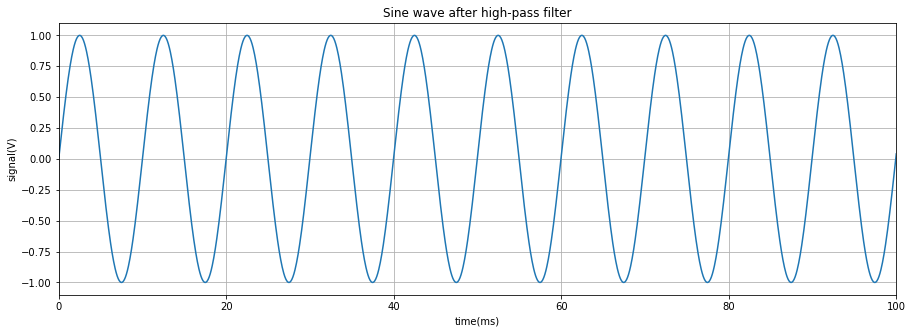

In [171]:
F = 100.
T = 2.
N = 2**15
DT = T/N
t = np.linspace(0., T, N)

y_sin = np.sin(2 * np.pi * F * t)  # Create a sine wave

f_fft = fftfreq(N, DT)
y_sin_fft = fft(y_sin)

# Apply the filter only to the non-zero frequency components
y_sin_fft_out = np.where(f_fft != 0, y_sin_fft * High_Filter(f_fft, R, C), y_sin_fft)
y_sin_out = ifft(y_sin_fft_out)

plt.figure(figsize=(15, 5))
plt.plot(1000 * t, np.real(y_sin_out))
ax = plt.gca()
ax.set_xlim(0., 100.)  # Show only the first 100 ms of the signal
ax.set_ylim(-1.1, 1.1)
plt.grid(True)
plt.title("Sine wave after high-pass filter")
plt.xlabel("time(ms)", position=(0.95, 1))
plt.ylabel("signal(V)", position=(1, 0.9))
plt.show()


Filter High cut off frequency is:   28.42 Hz
Filter Low cut off frequency is:    3.18 Hz


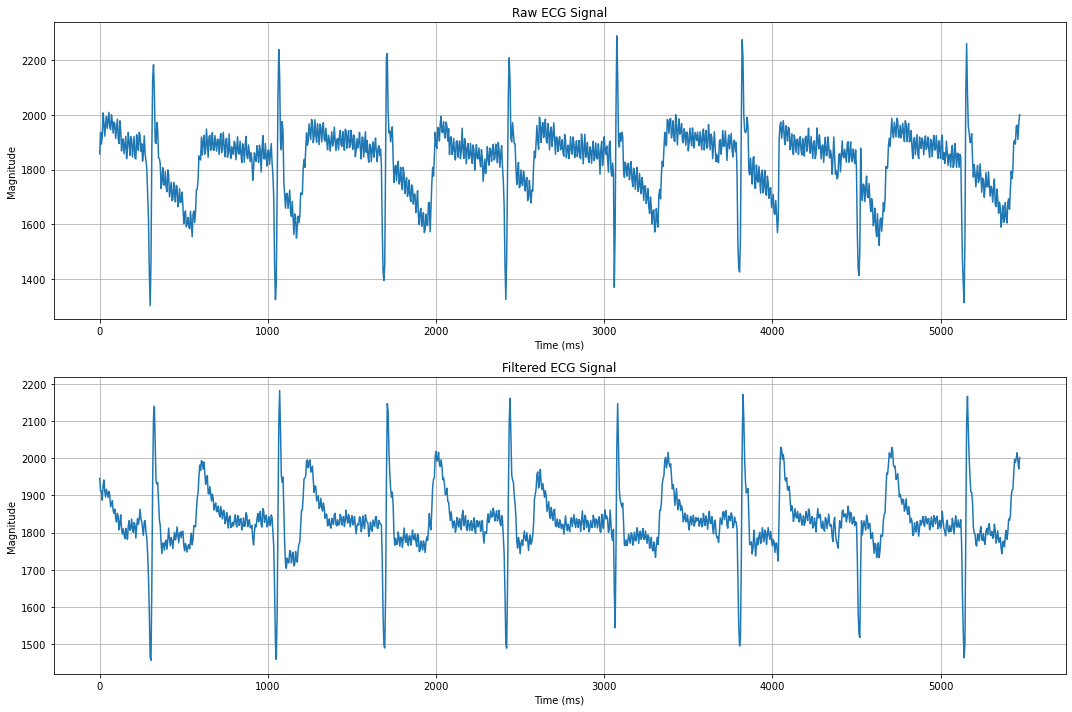

In [216]:
def Low_Pass_Filter(f, R_low, C_low):
    omega = 2 * np.pi * f
    vout = 1 / (1j * R_low * omega * C_low + 1)
    return vout

def High_Pass_Filter(f, R_high, C_high):
    omega = 2 * np.pi * f
    vout = (1j * R_high * omega * C_high) / (1 + 1j * R_high * omega * C_high)
    return vout

def Band_Pass_Filter(f, R_low, C_low, R_high, C_high):
    return High_Pass_Filter(f, R_high, C_high) * Low_Pass_Filter(f, R_low, C_low)

# Read data from the CSV file
data = pd.read_csv('data.csv', header=None)

# Convert the first row of the DataFrame to a NumPy array
y = data.to_numpy()
raw_y = y.reshape(1095,)

N = 1095
DT = 0.005  # Convert 5 ms to seconds
T = DT * (N - 1)

raw_x = np.arange(raw_y.shape[0]) * 5

f_fft = fftfreq(N, DT)
raw_y_fft = fft(raw_y)

R_low, C_low = 280, 20e-6
F_low_cut = 1./(2.*np.pi*R_low*C_low)
print("========================================")
print("Filter High cut off frequency is: {:7.2f} Hz".format(F_low_cut))
print("========================================")
R_high, C_high = 5000, 10e-6
F_high_cut = 1.0 / (2.0 * np.pi * R_high * C_high)
print("========================================")
print("Filter Low cut off frequency is: {:7.2f} Hz".format(F_high_cut))
print("========================================")

# Apply the band-pass filter to the non-zero frequency components
raw_y_fft_out = np.where(f_fft != 0, raw_y_fft * Band_Pass_Filter(f_fft, R_low, C_low, R_high, C_high), raw_y_fft)
raw_y_out = ifft(raw_y_fft_out)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(raw_x, raw_y)
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Raw ECG Signal')
plt.grid(True)
plt.tight_layout()  # Automatically adjust spacing between the 2 plots so they do not overlap

plt.subplot(2, 1, 2)
plt.plot(raw_x, np.real(raw_y_out))
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Filtered ECG Signal')
plt.grid(True)
plt.tight_layout()  # Automatically adjust spacing between the 2 plots so they do not overlap

plt.show()


Filter High cut off frequency is:   28.42 Hz
Filter Low cut off frequency is:    3.18 Hz


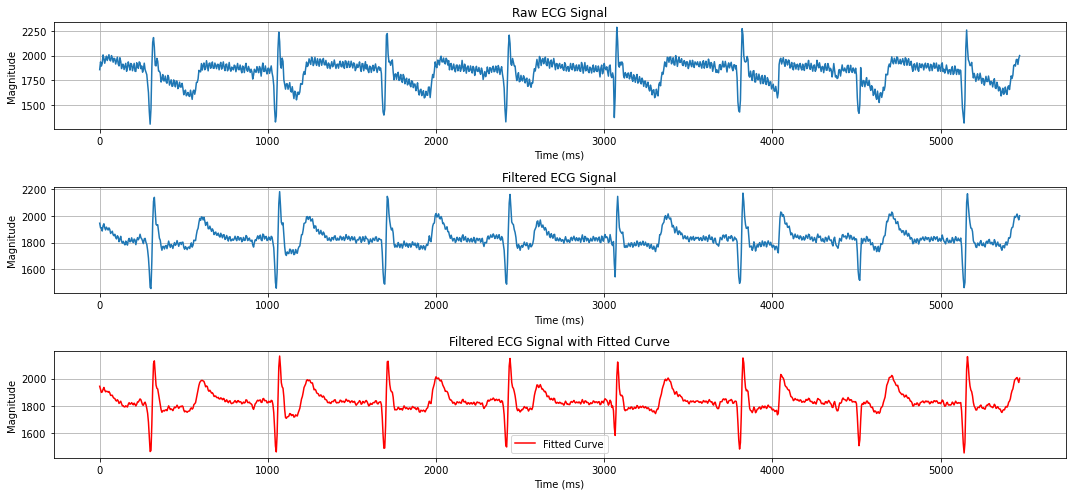

In [240]:
#DO the Fit
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
# Read data from the CSV file
data = pd.read_csv('data.csv', header=None)

# Convert the first row of the DataFrame to a NumPy array
y = data.to_numpy()
raw_y = y.reshape(1095,)

N = 1095
DT = 0.005  # Convert 5 ms to seconds
T = DT * (N - 1)

raw_x = np.arange(raw_y.shape[0]) * 5

f_fft = fftfreq(N, DT)
raw_y_fft = fft(raw_y)

R_low, C_low = 280, 20e-6
F_low_cut = 1./(2.*np.pi*R_low*C_low)
print("========================================")
print("Filter High cut off frequency is: {:7.2f} Hz".format(F_low_cut))
print("========================================")
R_high, C_high = 5000, 10e-6
F_high_cut = 1.0 / (2.0 * np.pi * R_high * C_high)
print("========================================")
print("Filter Low cut off frequency is: {:7.2f} Hz".format(F_high_cut))
print("========================================")

# Apply the band-pass filter to the non-zero frequency components
raw_y_fft_out = np.where(f_fft != 0, raw_y_fft * Band_Pass_Filter(f_fft, R_low, C_low, R_high, C_high), raw_y_fft)
raw_y_out = ifft(raw_y_fft_out)

# Compute the FFT of the filtered signal
raw_y_out_fft = fft(raw_y_out)

# Calculate the magnitudes and phases of the FFT components
magnitudes = np.abs(raw_y_out_fft)
phases = np.angle(raw_y_out_fft)

# Apply a Savitzky-Golay filter to the filtered ECG signal
window_length = 5
polyorder = 3
smoothed_signal = savgol_filter(np.real(raw_y_out), window_length, polyorder)

# Plot the normalized filtered ECG signal
plt.figure(figsize=(15, 7))

plt.subplot(3, 1, 1)
plt.plot(raw_x, raw_y)
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Raw ECG Signal')
plt.grid(True)
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(raw_x, np.real(raw_y_out))
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Filtered ECG Signal')
plt.grid(True)
plt.tight_layout()

plt.subplot(3, 1, 3)
#plt.plot(raw_x, np.real(raw_y_out), label='Filtered ECG Signal')
plt.plot(raw_x, smoothed_signal, color='red', label='Fitted Curve')
plt.xlabel('Time (ms)')
plt.ylabel('Magnitude')
plt.title('Filtered ECG Signal with Fitted Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Automatically adjust spacing between the 2 plots so they do not overlap

plt.show()

In [223]:
np.real(raw_y_out)

array([1945.89526309, 1911.71457449, 1911.78791946, ..., 1990.62958809,
       1971.25891606, 2002.07429978])

In [224]:
raw_x

array([   0,    5,   10, ..., 5460, 5465, 5470])